# 🔗 1. Accessing the Dataset
We mounted Google Drive to access a CSV file `(PostMalone.csv)` that contains the lyrics and metadata `(e.g., release year)` for Post Malone’s songs. This step ensures we can read and manipulate the dataset directly in Google Colab

In [152]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
path = '/content/drive/My Drive/AI Project/PostMalone.csv'
df = pd.read_csv(path)

Mounted at /content/drive


# 🔢 2. Calculating Word Frequencies
All the words were tokenized and counted to determine how often each word appears across all lyrics. We then extracted the top 30 most frequent words, as these are most relevant for analyzing **Zipf's Law**

In [146]:
from IPython.display import display
top_words['rank'] = range(1, len(top_words) + 1)
top_words['expected_freq'] = top_words['frequency'].iloc[0] / top_words['rank']
top_words['zipf_ratio'] = top_words['frequency'] / top_words['expected_freq']
display(top_words[['word', 'frequency', 'rank', 'expected_freq', 'zipf_ratio']])

,word,frequency,rank,expected_freq,zipf_ratio
0,i,2692,1,2692.000000,1.000000
1,you,1732,2,1346.000000,1.286776
2,the,1600,3,897.333333,1.783061
3,my,1245,4,673.000000,1.849926
4,me,1130,5,538.400000,2.098811
5,a,1071,6,448.666667,2.387073
6,and,1026,7,384.571429,2.667905
7,yeah,949,8,336.500000,2.820208
8,on,885,9,299.111111,2.958767
9,it,821,10,269.200000,3.049777


# 📈 3. Visualizing Word Frequency **(Bar Chart)**
We created a bar chart showing the 30 most frequent words in **Post Malone’s** lyrics. This provides a quick overview of the most commonly used vocabulary in his music

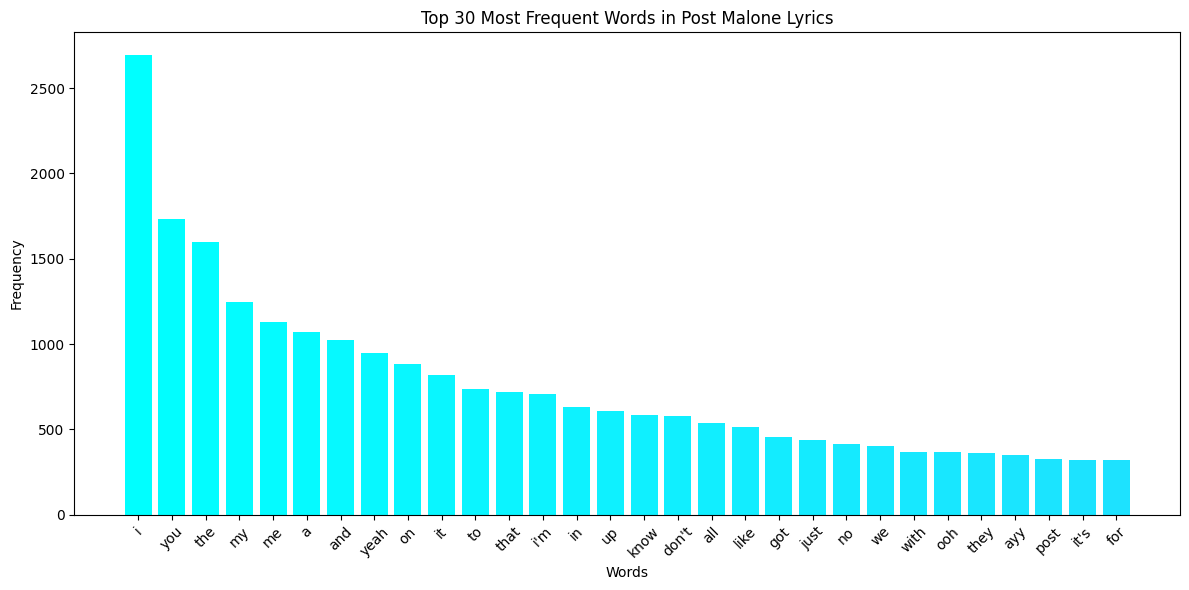

In [135]:
import matplotlib.pyplot as plt

lyrics = ' '.join(df['Lyric'].dropna()).lower()
lyricss = pd.Series(lyrics).iloc[0]
words = lyricss.split()

word_df = pd.DataFrame(words, columns=['word'])
word_freq = word_df.value_counts().reset_index(name='frequency')

top_words = word_freq.head(30)

colors = plt.cm.cool(range(len(top_words)))

plt.figure(figsize=(12, 6))
plt.bar(top_words['word'], top_words['frequency'], color=colors)
plt.title('Top 30 Most Frequent Words in Post Malone Lyrics')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 📅 4. Songs Released Per Year
We counted the number of songs released in each year and visualized the result using a bar graph. This helped identify trends in **Post Malone's** productivity and how often he released music over time

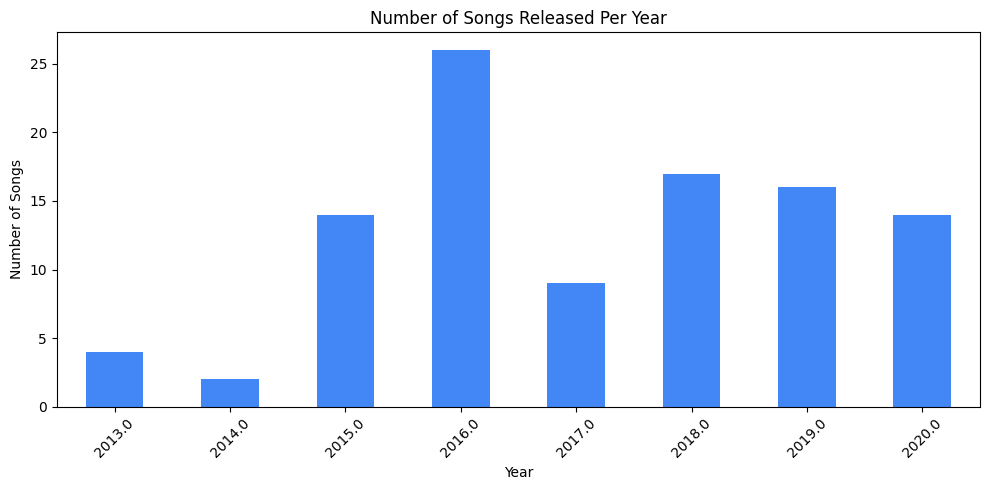

In [136]:
year_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
year_counts.plot(kind='bar', color='#4287f5')
plt.title('Number of Songs Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✍️ 5. Average Word Count Per Song Over Time
We calculated the number of words in each song and averaged them by year. A line plot was used to visualize how the average lyrical length has changed over time, indicating changes in style or complexity

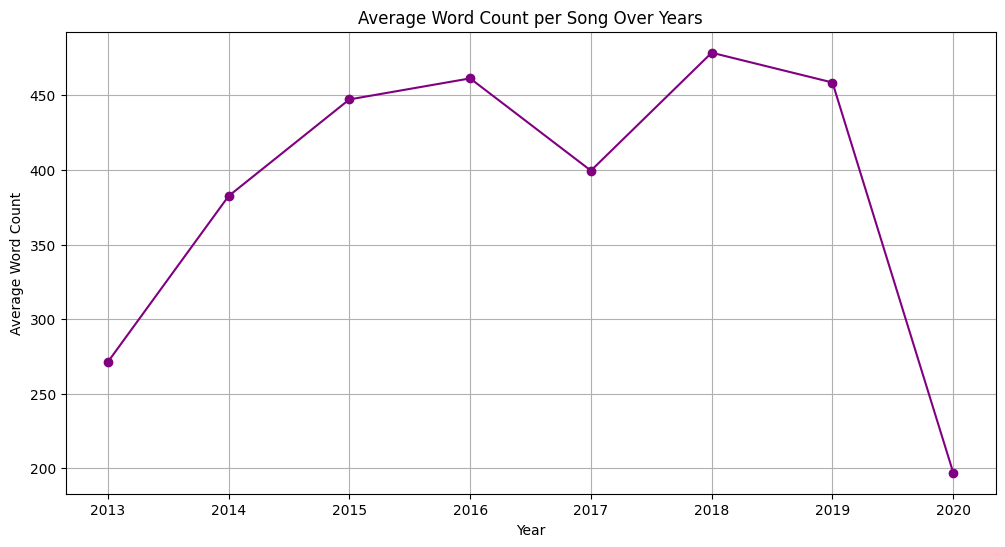

In [137]:
df['Lyric'] = df['Lyric'].fillna('').astype(str)
df['word_count'] = df['Lyric'].apply(lambda x: len(x.split()))
yearlyAverage = df.groupby('Year')['word_count'].mean()
plt.figure(figsize=(12, 6))
yearlyAverage.plot(marker='o', linestyle='-', color='purple')
plt.title('Average Word Count per Song Over Years')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Word Count')
plt.show()

# ⚖️ 6. Plotting Actual vs Expected Frequencies **(Zipf’s Law)**
We created a line plot comparing actual word frequencies to the theoretical frequencies predicted by **Zipf's Law**. The goal was to observe whether the word distribution in Post Malone's lyrics fits the expected logarithmic pattern

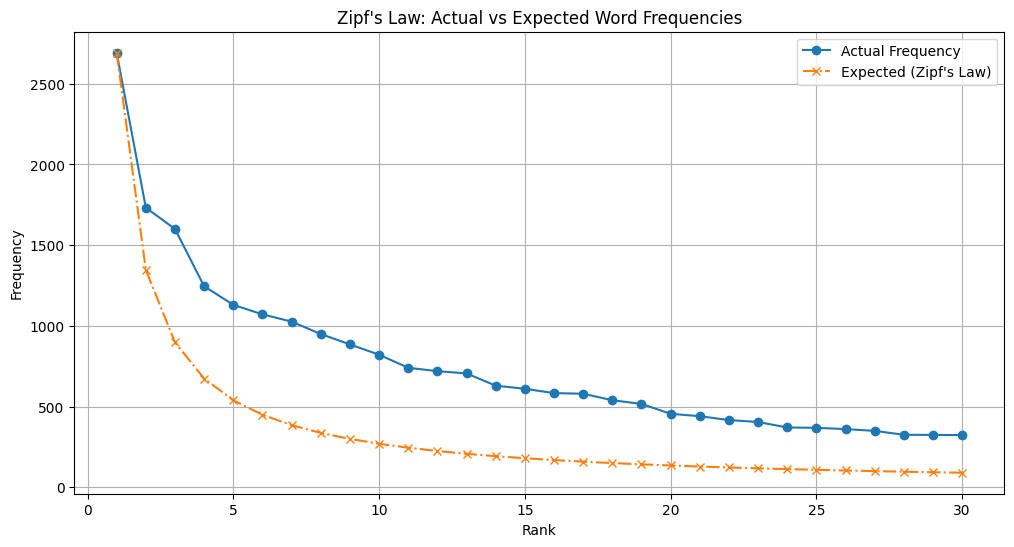

In [147]:
top_words = word_freq.head(30).reset_index(drop=True)
top_words['rank'] = range(1, len(top_words) + 1)

top_words['expected_freq'] = top_words['frequency'].iloc[0] / top_words['rank']
top_words['zipf_ratio'] = top_words['frequency'] / top_words['expected_freq']

plt.figure(figsize=(12, 6))
plt.plot(top_words['rank'], top_words['frequency'], label='Actual Frequency', marker='o')
plt.plot(top_words['rank'], top_words['expected_freq'], label="Expected (Zipf's Law)", linestyle='-.', marker='x')
plt.title("Zipf's Law: Actual vs Expected Word Frequencies")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


## ✅ So What’s Happening?

Yes, the top words this dataset *do* follow **Zipf’s Law in principle**, meaning:

- High-frequency function words like `"I"`, `"you"`, `"the"`, `"and"`, `"it"`, etc., are at the top — as Zipf’s Law predicts.
- The frequencies **decrease as rank increases**, though not perfectly smoothly.

---

## 🤔 But Why Might It Still Seem Like It Doesn’t Follow Zipf’s Law Perfectly?

Even if the word ordering is broadly correct, your Zipf plot may still show **deviations from the expected curve** for a few reasons:

### 1. 📉 Dataset Size and Scope
- Zipf’s Law becomes more precise with **large, diverse text corpora** (e.g., entire languages or books).
- This dataset focuses on **a single artist's lyrics**, which limits vocabulary variety.

### 2. 🔁 Repetition Effects in Lyrics
- Songs repeat words for **emphasis, rhythm, and hooks** (e.g., `"yeah"`, `"ooh"`, `"ayy"`).
- This repetition **artificially boosts** certain word frequencies and disrupts a smooth Zipfian decay.

### 3. ✍️ Stylistic Language
- Words like `"don’t"`, `"i’m"`, `"post"`, `"ayy"` reflect **Post Malone's personal style**, not general English usage.
- These stylistic choices introduce **non-standard frequency patterns**.

---

## 📊 In Short:

- ✅ **Yes**: The word order mostly follows Zipf’s Law — common function words come first.
- ❌ **No**: The frequency decay doesn’t match the ideal 1/rank model perfectly, due to:
  - Limited dataset scope
  - Repetitive lyrical structure
  - Artistic and stylistic influence
